In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

#from torch.optim import NAdam

# Define learning parameters

In [3]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [4]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [5]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [7]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [8]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [9]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [10]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [11]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [12]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [13]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [14]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

torch.Size([64, 128])

# Q. Write training loop

118it [00:03, 30.20it/s]                         


Epoch 1 of 200
Generator loss: 0.82066610, Discriminator loss: 1.22191440


118it [00:04, 26.33it/s]                         


Epoch 2 of 200
Generator loss: 1.12027769, Discriminator loss: 1.03349034


118it [00:04, 27.43it/s]                         


Epoch 3 of 200
Generator loss: 1.69556461, Discriminator loss: 0.82437759


118it [00:04, 27.57it/s]                         


Epoch 4 of 200
Generator loss: 2.05174301, Discriminator loss: 0.83141212


118it [00:04, 29.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


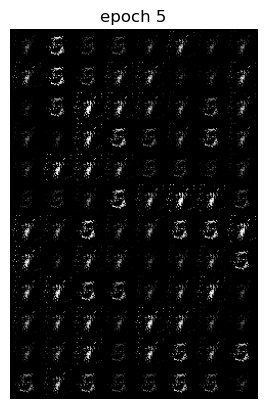

Epoch 5 of 200
Generator loss: 2.30301495, Discriminator loss: 0.74784966


118it [00:10, 11.11it/s]                         


Epoch 6 of 200
Generator loss: 2.26704034, Discriminator loss: 0.75884363


118it [00:12,  9.52it/s]                         


Epoch 7 of 200
Generator loss: 2.77863317, Discriminator loss: 0.67367749


118it [00:12,  9.31it/s]                         


Epoch 8 of 200
Generator loss: 2.74709560, Discriminator loss: 0.64067399


118it [00:12,  9.79it/s]                         


Epoch 9 of 200
Generator loss: 3.08051686, Discriminator loss: 0.59430155


118it [00:12,  9.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


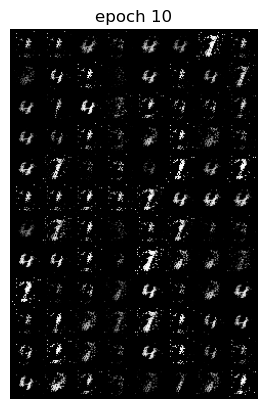

Epoch 10 of 200
Generator loss: 2.75488496, Discriminator loss: 0.65683867


118it [00:12,  9.29it/s]                         


Epoch 11 of 200
Generator loss: 2.58801124, Discriminator loss: 0.66024154


118it [00:12,  9.57it/s]                         


Epoch 12 of 200
Generator loss: 2.52145530, Discriminator loss: 0.80714247


118it [00:12,  9.54it/s]                         


Epoch 13 of 200
Generator loss: 2.19204564, Discriminator loss: 0.75985275


118it [00:12,  9.53it/s]                         


Epoch 14 of 200
Generator loss: 2.19485477, Discriminator loss: 0.80859246


118it [00:12,  9.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


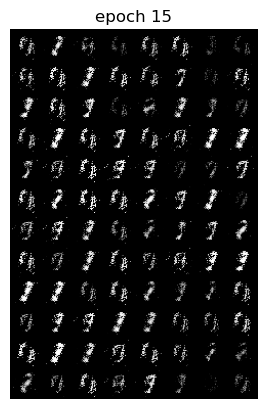

Epoch 15 of 200
Generator loss: 2.49879055, Discriminator loss: 0.64504050


118it [00:12,  9.43it/s]                         


Epoch 16 of 200
Generator loss: 2.50048537, Discriminator loss: 0.69635043


118it [00:12,  9.36it/s]                         


Epoch 17 of 200
Generator loss: 2.38949313, Discriminator loss: 0.68635859


118it [00:12,  9.36it/s]                         


Epoch 18 of 200
Generator loss: 2.18634145, Discriminator loss: 0.76029161


118it [00:12,  9.54it/s]                         


Epoch 19 of 200
Generator loss: 2.39381171, Discriminator loss: 0.67180737


118it [00:12,  9.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


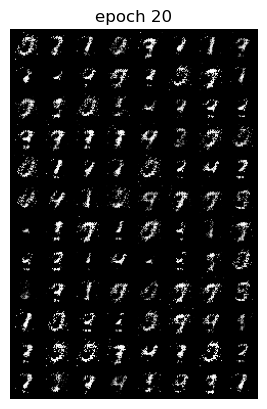

Epoch 20 of 200
Generator loss: 2.25143146, Discriminator loss: 0.74269218


118it [00:12,  9.13it/s]                         


Epoch 21 of 200
Generator loss: 2.18976967, Discriminator loss: 0.71192051


118it [00:13,  9.06it/s]                         


Epoch 22 of 200
Generator loss: 2.21243989, Discriminator loss: 0.71436032


118it [00:12,  9.14it/s]                         


Epoch 23 of 200
Generator loss: 2.28940192, Discriminator loss: 0.73266211


118it [00:12,  9.08it/s]                         


Epoch 24 of 200
Generator loss: 2.18457416, Discriminator loss: 0.70078940


118it [00:12,  9.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


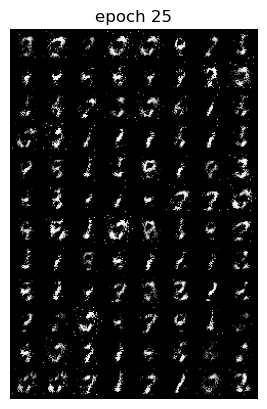

Epoch 25 of 200
Generator loss: 2.41833797, Discriminator loss: 0.63783754


118it [00:12,  9.55it/s]                         


Epoch 26 of 200
Generator loss: 2.26340770, Discriminator loss: 0.68951111


118it [00:12,  9.33it/s]                         


Epoch 27 of 200
Generator loss: 2.31991694, Discriminator loss: 0.70810301


118it [00:11,  9.90it/s]                         


Epoch 28 of 200
Generator loss: 2.09361101, Discriminator loss: 0.69944522


118it [00:12,  9.19it/s]                         


Epoch 29 of 200
Generator loss: 2.26082448, Discriminator loss: 0.67333063


118it [00:12,  9.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


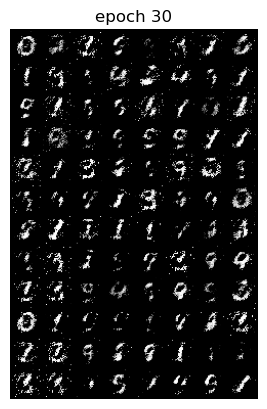

Epoch 30 of 200
Generator loss: 2.09263405, Discriminator loss: 0.72842831


118it [00:12,  9.18it/s]                         


Epoch 31 of 200
Generator loss: 2.15528049, Discriminator loss: 0.68124430


118it [00:12,  9.31it/s]                         


Epoch 32 of 200
Generator loss: 2.05635024, Discriminator loss: 0.74315954


118it [00:12,  9.27it/s]                         


Epoch 33 of 200
Generator loss: 2.25950309, Discriminator loss: 0.64713155


118it [00:12,  9.32it/s]                         


Epoch 34 of 200
Generator loss: 2.14605148, Discriminator loss: 0.72376945


118it [00:12,  9.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


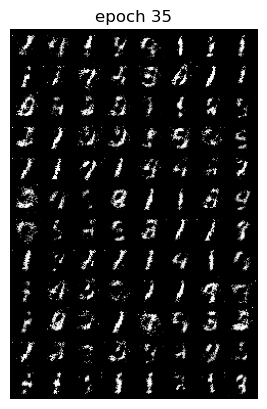

Epoch 35 of 200
Generator loss: 2.07656281, Discriminator loss: 0.74190840


118it [00:12,  9.18it/s]                         


Epoch 36 of 200
Generator loss: 2.05177698, Discriminator loss: 0.71623327


118it [00:12,  9.10it/s]                         


Epoch 37 of 200
Generator loss: 2.10670819, Discriminator loss: 0.68820469


118it [00:12,  9.13it/s]                         


Epoch 38 of 200
Generator loss: 2.10693637, Discriminator loss: 0.74957938


118it [00:12,  9.14it/s]                         


Epoch 39 of 200
Generator loss: 1.89707054, Discriminator loss: 0.81424378


118it [00:12,  9.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


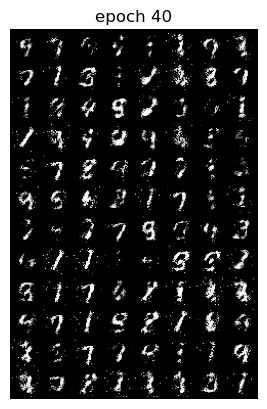

Epoch 40 of 200
Generator loss: 1.95343897, Discriminator loss: 0.81244735


118it [00:12,  9.55it/s]                         


Epoch 41 of 200
Generator loss: 1.93649825, Discriminator loss: 0.81948288


118it [00:12,  9.19it/s]                         


Epoch 42 of 200
Generator loss: 2.02454007, Discriminator loss: 0.76178927


118it [00:12,  9.37it/s]                         


Epoch 43 of 200
Generator loss: 1.99405664, Discriminator loss: 0.75805128


118it [00:12,  9.36it/s]                         


Epoch 44 of 200
Generator loss: 1.94675296, Discriminator loss: 0.77995551


118it [00:12,  9.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


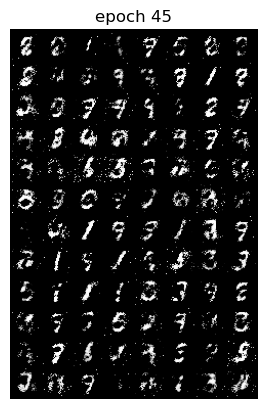

Epoch 45 of 200
Generator loss: 1.94748117, Discriminator loss: 0.77858828


118it [00:12,  9.32it/s]                         


Epoch 46 of 200
Generator loss: 1.85959109, Discriminator loss: 0.82491637


118it [00:12,  9.23it/s]                         


Epoch 47 of 200
Generator loss: 1.96716104, Discriminator loss: 0.77647177


118it [00:12,  9.22it/s]                         


Epoch 48 of 200
Generator loss: 1.93402910, Discriminator loss: 0.76310649


118it [00:11, 10.03it/s]                         


Epoch 49 of 200
Generator loss: 2.04134443, Discriminator loss: 0.73574120


118it [00:11, 10.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


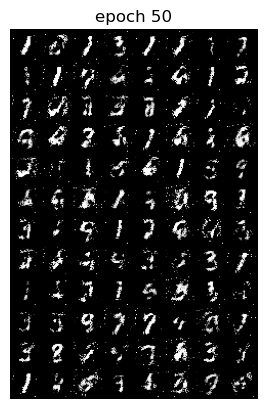

Epoch 50 of 200
Generator loss: 1.95551962, Discriminator loss: 0.77379900


118it [00:12,  9.26it/s]                         


Epoch 51 of 200
Generator loss: 1.95437491, Discriminator loss: 0.81068785


118it [00:12,  9.41it/s]                         


Epoch 52 of 200
Generator loss: 1.91582102, Discriminator loss: 0.76298172


118it [00:12,  9.45it/s]                         


Epoch 53 of 200
Generator loss: 1.97307458, Discriminator loss: 0.76302740


118it [00:12,  9.54it/s]                         


Epoch 54 of 200
Generator loss: 1.93233181, Discriminator loss: 0.78356734


118it [00:12,  9.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


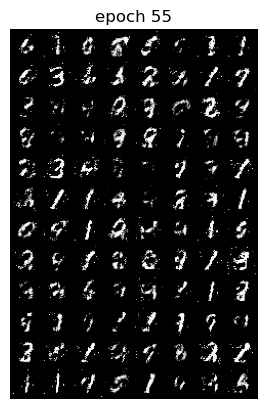

Epoch 55 of 200
Generator loss: 1.89044044, Discriminator loss: 0.81406975


118it [00:12,  9.75it/s]                         


Epoch 56 of 200
Generator loss: 1.85471588, Discriminator loss: 0.81786038


118it [00:11,  9.84it/s]                         


Epoch 57 of 200
Generator loss: 1.79569803, Discriminator loss: 0.83733454


118it [00:12,  9.64it/s]                         


Epoch 58 of 200
Generator loss: 1.83744945, Discriminator loss: 0.83465572


118it [00:12,  9.24it/s]                         


Epoch 59 of 200
Generator loss: 1.85109985, Discriminator loss: 0.82578289


118it [00:12,  9.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


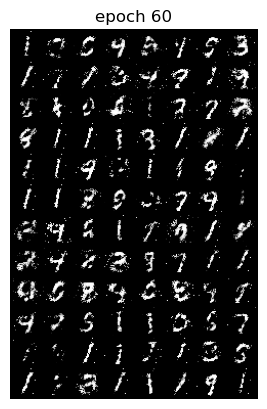

Epoch 60 of 200
Generator loss: 1.78749118, Discriminator loss: 0.83904645


118it [00:12,  9.27it/s]                         


Epoch 61 of 200
Generator loss: 1.80664362, Discriminator loss: 0.81966137


118it [00:12,  9.14it/s]                         


Epoch 62 of 200
Generator loss: 1.80565431, Discriminator loss: 0.82921944


118it [00:12,  9.11it/s]                         


Epoch 63 of 200
Generator loss: 1.81590564, Discriminator loss: 0.83664494


118it [00:12,  9.17it/s]                         


Epoch 64 of 200
Generator loss: 1.81376879, Discriminator loss: 0.82795877


118it [00:12,  9.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


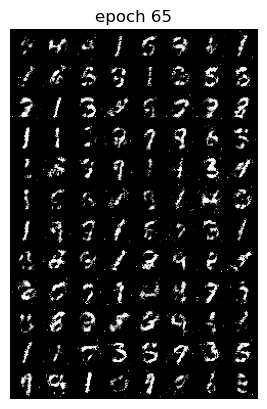

Epoch 65 of 200
Generator loss: 1.76939737, Discriminator loss: 0.85838971


118it [00:12,  9.18it/s]                         


Epoch 66 of 200
Generator loss: 1.79889873, Discriminator loss: 0.82791330


118it [00:12,  9.45it/s]                         


Epoch 67 of 200
Generator loss: 1.75078121, Discriminator loss: 0.86235740


118it [00:12,  9.69it/s]                         


Epoch 68 of 200
Generator loss: 1.70212095, Discriminator loss: 0.88381218


118it [00:12,  9.47it/s]                         


Epoch 69 of 200
Generator loss: 1.72443180, Discriminator loss: 0.85446316


118it [00:12,  9.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


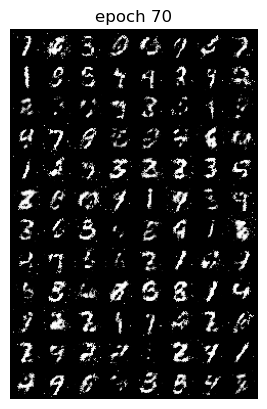

Epoch 70 of 200
Generator loss: 1.67818307, Discriminator loss: 0.87347522


118it [00:11,  9.86it/s]                         


Epoch 71 of 200
Generator loss: 1.58026462, Discriminator loss: 0.92540472


118it [00:12,  9.33it/s]                         


Epoch 72 of 200
Generator loss: 1.55652287, Discriminator loss: 0.92823250


118it [00:11, 10.11it/s]                         


Epoch 73 of 200
Generator loss: 1.59842161, Discriminator loss: 0.92508880


118it [00:12,  9.35it/s]                         


Epoch 74 of 200
Generator loss: 1.61658153, Discriminator loss: 0.91870474


118it [00:12,  9.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


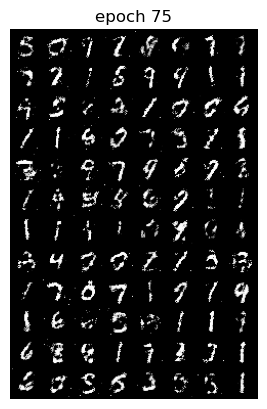

Epoch 75 of 200
Generator loss: 1.53998921, Discriminator loss: 0.94202309


118it [00:12,  9.26it/s]                         


Epoch 76 of 200
Generator loss: 1.55344091, Discriminator loss: 0.93289414


118it [00:12,  9.24it/s]                         


Epoch 77 of 200
Generator loss: 1.50135123, Discriminator loss: 0.97274874


118it [00:12,  9.22it/s]                         


Epoch 78 of 200
Generator loss: 1.43901818, Discriminator loss: 0.97958941


118it [00:12,  9.20it/s]                         


Epoch 79 of 200
Generator loss: 1.45903158, Discriminator loss: 0.96693211


118it [00:12,  9.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


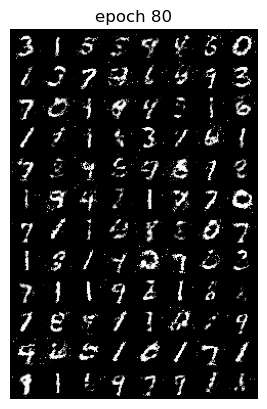

Epoch 80 of 200
Generator loss: 1.46852741, Discriminator loss: 0.97338980


118it [00:12,  9.36it/s]                         


Epoch 81 of 200
Generator loss: 1.48758504, Discriminator loss: 0.96958069


118it [00:12,  9.15it/s]                         


Epoch 82 of 200
Generator loss: 1.44673513, Discriminator loss: 0.98469961


118it [00:06, 18.87it/s]                         


Epoch 83 of 200
Generator loss: 1.50627873, Discriminator loss: 0.95563915


118it [00:04, 26.27it/s]                         


Epoch 84 of 200
Generator loss: 1.44227988, Discriminator loss: 0.98046760


118it [00:04, 26.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


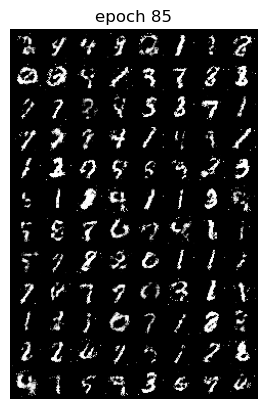

Epoch 85 of 200
Generator loss: 1.49114318, Discriminator loss: 0.95956332


118it [00:04, 26.62it/s]                         


Epoch 86 of 200
Generator loss: 1.44936317, Discriminator loss: 0.98730283


118it [00:04, 26.88it/s]                         


Epoch 87 of 200
Generator loss: 1.47207847, Discriminator loss: 0.98437339


118it [00:09, 12.55it/s]                         


Epoch 88 of 200
Generator loss: 1.41983564, Discriminator loss: 0.99798065


118it [00:12,  9.54it/s]                         


Epoch 89 of 200
Generator loss: 1.38469160, Discriminator loss: 1.00084600


118it [00:12,  9.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


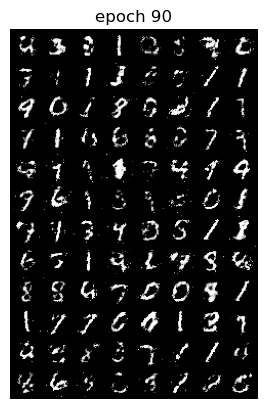

Epoch 90 of 200
Generator loss: 1.39013944, Discriminator loss: 1.02298108


118it [00:12,  9.39it/s]                         


Epoch 91 of 200
Generator loss: 1.34349299, Discriminator loss: 1.04418507


118it [00:12,  9.55it/s]                         


Epoch 92 of 200
Generator loss: 1.37397467, Discriminator loss: 1.02715978


118it [00:12,  9.27it/s]                         


Epoch 93 of 200
Generator loss: 1.37051969, Discriminator loss: 1.02603314


118it [00:12,  9.27it/s]                         


Epoch 94 of 200
Generator loss: 1.38003280, Discriminator loss: 1.01465670


118it [00:12,  9.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


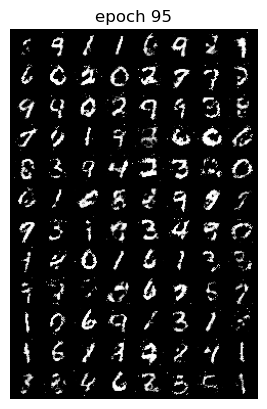

Epoch 95 of 200
Generator loss: 1.35453845, Discriminator loss: 1.03120514


118it [00:12,  9.29it/s]                         


Epoch 96 of 200
Generator loss: 1.36281388, Discriminator loss: 1.02968217


118it [00:12,  9.29it/s]                         


Epoch 97 of 200
Generator loss: 1.34256828, Discriminator loss: 1.02187063


118it [00:13,  9.07it/s]                         


Epoch 98 of 200
Generator loss: 1.34857433, Discriminator loss: 1.03222030


118it [00:13,  8.97it/s]                         


Epoch 99 of 200
Generator loss: 1.37300317, Discriminator loss: 1.02644716


118it [00:12,  9.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


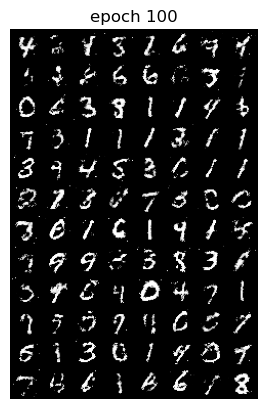

Epoch 100 of 200
Generator loss: 1.35021729, Discriminator loss: 1.03326490


118it [00:12,  9.12it/s]                         


Epoch 101 of 200
Generator loss: 1.33289540, Discriminator loss: 1.04974670


118it [00:12,  9.28it/s]                         


Epoch 102 of 200
Generator loss: 1.34198163, Discriminator loss: 1.03447006


118it [00:12,  9.77it/s]                         


Epoch 103 of 200
Generator loss: 1.35146944, Discriminator loss: 1.03819698


118it [00:12,  9.58it/s]                         


Epoch 104 of 200
Generator loss: 1.27604175, Discriminator loss: 1.06648487


118it [00:12,  9.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


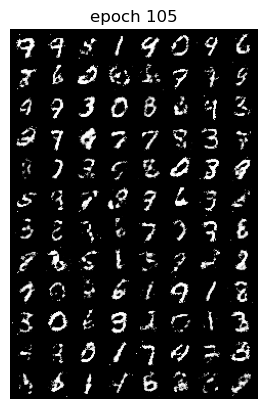

Epoch 105 of 200
Generator loss: 1.31946525, Discriminator loss: 1.05127888


118it [00:12,  9.49it/s]                         


Epoch 106 of 200
Generator loss: 1.28568743, Discriminator loss: 1.06733966


118it [00:12,  9.30it/s]                         


Epoch 107 of 200
Generator loss: 1.29874410, Discriminator loss: 1.05793374


118it [00:12,  9.51it/s]                         


Epoch 108 of 200
Generator loss: 1.27909990, Discriminator loss: 1.07091027


118it [00:12,  9.31it/s]                         


Epoch 109 of 200
Generator loss: 1.29002594, Discriminator loss: 1.06847126


118it [00:12,  9.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


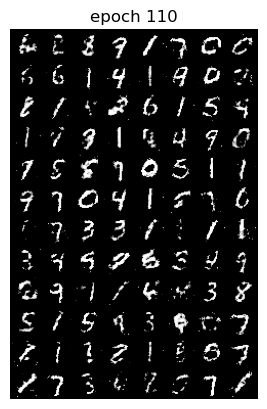

Epoch 110 of 200
Generator loss: 1.29086384, Discriminator loss: 1.06816122


118it [00:12,  9.35it/s]                         


Epoch 111 of 200
Generator loss: 1.26846857, Discriminator loss: 1.07261922


118it [00:12,  9.16it/s]                         


Epoch 112 of 200
Generator loss: 1.25333996, Discriminator loss: 1.07880344


118it [00:12,  9.35it/s]                         


Epoch 113 of 200
Generator loss: 1.28542889, Discriminator loss: 1.06718021


118it [00:12,  9.58it/s]                         


Epoch 114 of 200
Generator loss: 1.27478168, Discriminator loss: 1.07204978


118it [00:12,  9.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


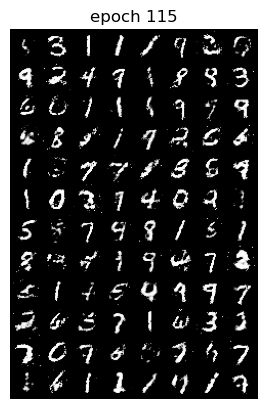

Epoch 115 of 200
Generator loss: 1.27188557, Discriminator loss: 1.07031109


118it [00:12,  9.32it/s]                         


Epoch 116 of 200
Generator loss: 1.24603259, Discriminator loss: 1.08400735


118it [00:12,  9.17it/s]                         


Epoch 117 of 200
Generator loss: 1.24916766, Discriminator loss: 1.08815861


118it [00:12,  9.18it/s]                         


Epoch 118 of 200
Generator loss: 1.24732538, Discriminator loss: 1.08563058


118it [00:12,  9.19it/s]                         


Epoch 119 of 200
Generator loss: 1.25669173, Discriminator loss: 1.08551013


118it [00:12,  9.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


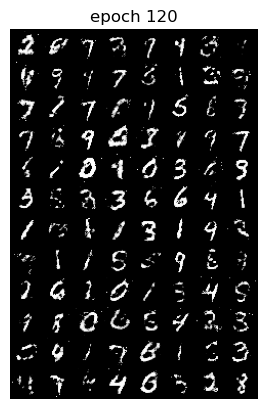

Epoch 120 of 200
Generator loss: 1.22978964, Discriminator loss: 1.09302704


118it [00:12,  9.20it/s]                         


Epoch 121 of 200
Generator loss: 1.25538930, Discriminator loss: 1.08160006


118it [00:12,  9.17it/s]                         


Epoch 122 of 200
Generator loss: 1.26367976, Discriminator loss: 1.07840292


118it [00:12,  9.31it/s]                         


Epoch 123 of 200
Generator loss: 1.26338020, Discriminator loss: 1.07642334


118it [00:12,  9.17it/s]                         


Epoch 124 of 200
Generator loss: 1.25813460, Discriminator loss: 1.07942686


118it [00:12,  9.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


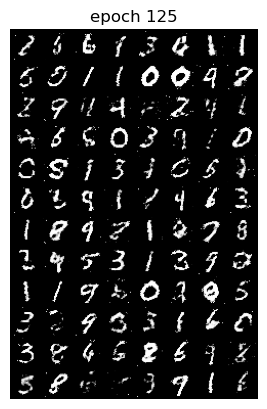

Epoch 125 of 200
Generator loss: 1.27409204, Discriminator loss: 1.07449187


118it [00:12,  9.49it/s]                         


Epoch 126 of 200
Generator loss: 1.25725874, Discriminator loss: 1.08662661


118it [00:12,  9.23it/s]                         


Epoch 127 of 200
Generator loss: 1.24202418, Discriminator loss: 1.08724017


118it [00:12,  9.46it/s]                         


Epoch 128 of 200
Generator loss: 1.23775341, Discriminator loss: 1.08684063


118it [00:12,  9.25it/s]                         


Epoch 129 of 200
Generator loss: 1.25297039, Discriminator loss: 1.08043640


118it [00:12,  9.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


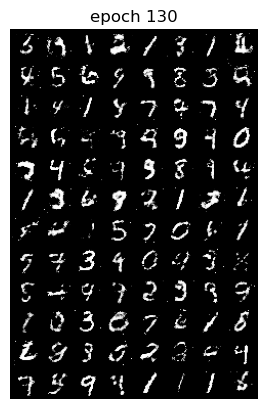

Epoch 130 of 200
Generator loss: 1.23988614, Discriminator loss: 1.09125135


118it [00:12,  9.29it/s]                         


Epoch 131 of 200
Generator loss: 1.22148969, Discriminator loss: 1.09830182


118it [00:12,  9.20it/s]                         


Epoch 132 of 200
Generator loss: 1.23524935, Discriminator loss: 1.08693977


118it [00:12,  9.32it/s]                         


Epoch 133 of 200
Generator loss: 1.22426844, Discriminator loss: 1.09583546


118it [00:12,  9.22it/s]                         


Epoch 134 of 200
Generator loss: 1.22778582, Discriminator loss: 1.09044185


118it [00:12,  9.25it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


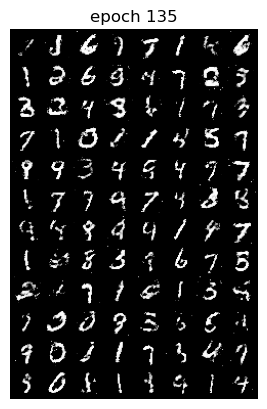

Epoch 135 of 200
Generator loss: 1.22541414, Discriminator loss: 1.09628919


118it [00:12,  9.25it/s]                         


Epoch 136 of 200
Generator loss: 1.21043968, Discriminator loss: 1.10650757


118it [00:12,  9.37it/s]                         


Epoch 137 of 200
Generator loss: 1.22553563, Discriminator loss: 1.09998381


118it [00:12,  9.37it/s]                         


Epoch 138 of 200
Generator loss: 1.21260210, Discriminator loss: 1.11313437


118it [00:12,  9.67it/s]                         


Epoch 139 of 200
Generator loss: 1.19027732, Discriminator loss: 1.11629936


118it [00:12,  9.22it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


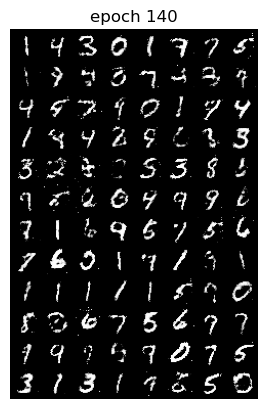

Epoch 140 of 200
Generator loss: 1.19363152, Discriminator loss: 1.11390460


118it [00:12,  9.22it/s]                         


Epoch 141 of 200
Generator loss: 1.21567074, Discriminator loss: 1.10476782


118it [00:12,  9.28it/s]                         


Epoch 142 of 200
Generator loss: 1.20410800, Discriminator loss: 1.11093996


118it [00:12,  9.34it/s]                         


Epoch 143 of 200
Generator loss: 1.19521159, Discriminator loss: 1.11460574


118it [00:12,  9.26it/s]                         


Epoch 144 of 200
Generator loss: 1.19268187, Discriminator loss: 1.12208872


118it [00:13,  9.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


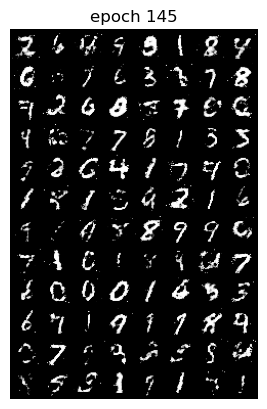

Epoch 145 of 200
Generator loss: 1.19570709, Discriminator loss: 1.11616093


118it [00:13,  9.05it/s]                         


Epoch 146 of 200
Generator loss: 1.18775796, Discriminator loss: 1.12368974


118it [00:13,  9.06it/s]                         


Epoch 147 of 200
Generator loss: 1.18751343, Discriminator loss: 1.11818891


118it [00:12,  9.14it/s]                         


Epoch 148 of 200
Generator loss: 1.19047889, Discriminator loss: 1.11864926


118it [00:12,  9.18it/s]                         


Epoch 149 of 200
Generator loss: 1.18325848, Discriminator loss: 1.12781326


118it [00:12,  9.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


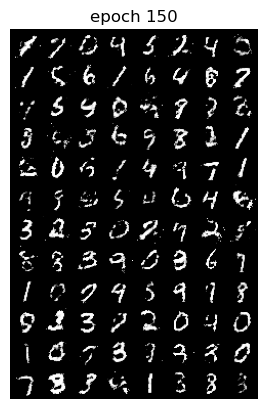

Epoch 150 of 200
Generator loss: 1.20568658, Discriminator loss: 1.11826621


118it [00:13,  9.01it/s]                         


Epoch 151 of 200
Generator loss: 1.20825780, Discriminator loss: 1.11763261


118it [00:12,  9.13it/s]                         


Epoch 152 of 200
Generator loss: 1.19005387, Discriminator loss: 1.11956782


118it [00:12,  9.21it/s]                         


Epoch 153 of 200
Generator loss: 1.17612541, Discriminator loss: 1.12475677


118it [00:12,  9.21it/s]                         


Epoch 154 of 200
Generator loss: 1.19049548, Discriminator loss: 1.12354633


118it [00:12,  9.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


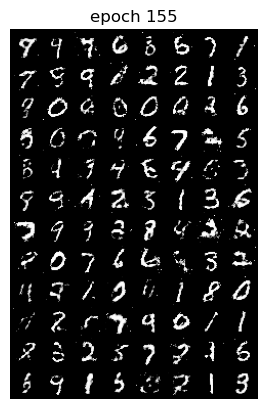

Epoch 155 of 200
Generator loss: 1.17907622, Discriminator loss: 1.13127448


118it [00:12,  9.36it/s]                         


Epoch 156 of 200
Generator loss: 1.16769405, Discriminator loss: 1.12411051


118it [00:12,  9.12it/s]                         


Epoch 157 of 200
Generator loss: 1.19959510, Discriminator loss: 1.12413031


118it [00:12,  9.16it/s]                         


Epoch 158 of 200
Generator loss: 1.18239466, Discriminator loss: 1.12753440


118it [00:12,  9.13it/s]                         


Epoch 159 of 200
Generator loss: 1.14575183, Discriminator loss: 1.13429447


118it [00:12,  9.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


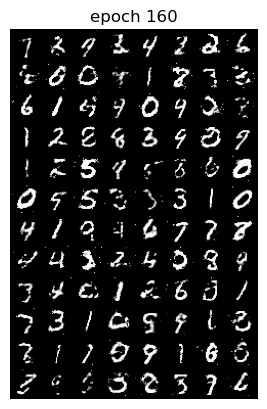

Epoch 160 of 200
Generator loss: 1.14881653, Discriminator loss: 1.13823402


118it [00:13,  9.04it/s]                         


Epoch 161 of 200
Generator loss: 1.16143845, Discriminator loss: 1.13101872


118it [00:12,  9.20it/s]                         


Epoch 162 of 200
Generator loss: 1.16080282, Discriminator loss: 1.13276790


118it [00:12,  9.24it/s]                         


Epoch 163 of 200
Generator loss: 1.19035811, Discriminator loss: 1.12622660


118it [00:12,  9.21it/s]                         


Epoch 164 of 200
Generator loss: 1.16571061, Discriminator loss: 1.13455073


118it [00:12,  9.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


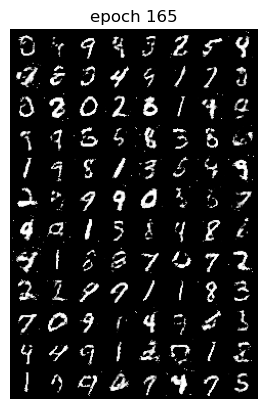

Epoch 165 of 200
Generator loss: 1.15329492, Discriminator loss: 1.13665034


118it [00:12,  9.24it/s]                         


Epoch 166 of 200
Generator loss: 1.15989055, Discriminator loss: 1.13374238


118it [00:12,  9.19it/s]                         


Epoch 167 of 200
Generator loss: 1.15541823, Discriminator loss: 1.14117919


118it [00:12,  9.13it/s]                         


Epoch 168 of 200
Generator loss: 1.16946727, Discriminator loss: 1.13292697


118it [00:12,  9.34it/s]                         


Epoch 169 of 200
Generator loss: 1.14754973, Discriminator loss: 1.13836936


118it [00:12,  9.17it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


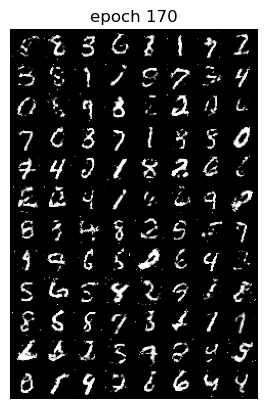

Epoch 170 of 200
Generator loss: 1.16480625, Discriminator loss: 1.14132845


118it [00:12,  9.18it/s]                         


Epoch 171 of 200
Generator loss: 1.15813588, Discriminator loss: 1.14795055


118it [00:12,  9.25it/s]                         


Epoch 172 of 200
Generator loss: 1.14939425, Discriminator loss: 1.14194507


118it [00:12,  9.11it/s]                         


Epoch 173 of 200
Generator loss: 1.13868903, Discriminator loss: 1.14613349


118it [00:12,  9.33it/s]                         


Epoch 174 of 200
Generator loss: 1.13490895, Discriminator loss: 1.15218740


118it [00:12,  9.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


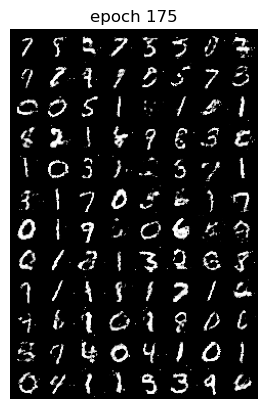

Epoch 175 of 200
Generator loss: 1.15673056, Discriminator loss: 1.13721651


118it [00:12,  9.71it/s]                         


Epoch 176 of 200
Generator loss: 1.17220959, Discriminator loss: 1.14092220


118it [00:12,  9.44it/s]                         


Epoch 177 of 200
Generator loss: 1.13961809, Discriminator loss: 1.15262607


118it [00:12,  9.26it/s]                         


Epoch 178 of 200
Generator loss: 1.14824732, Discriminator loss: 1.14388991


118it [00:11, 10.57it/s]                         


Epoch 179 of 200
Generator loss: 1.13637955, Discriminator loss: 1.14699693


118it [00:11,  9.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


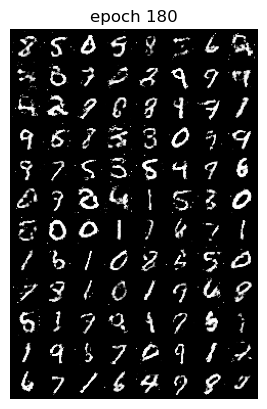

Epoch 180 of 200
Generator loss: 1.12232579, Discriminator loss: 1.15263451


118it [00:03, 30.15it/s]                         


Epoch 181 of 200
Generator loss: 1.10793226, Discriminator loss: 1.16740901


118it [00:04, 26.11it/s]                         


Epoch 182 of 200
Generator loss: 1.12458051, Discriminator loss: 1.15095698


118it [00:04, 25.75it/s]                         


Epoch 183 of 200
Generator loss: 1.14143163, Discriminator loss: 1.15234969


118it [00:04, 26.33it/s]                         


Epoch 184 of 200
Generator loss: 1.13383798, Discriminator loss: 1.14413294


118it [00:04, 25.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


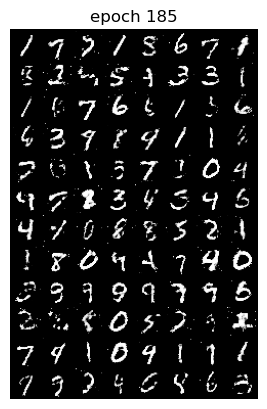

Epoch 185 of 200
Generator loss: 1.12971394, Discriminator loss: 1.16245976


118it [00:04, 25.82it/s]                         


Epoch 186 of 200
Generator loss: 1.12020693, Discriminator loss: 1.16425689


118it [00:04, 26.04it/s]                         


Epoch 187 of 200
Generator loss: 1.13166817, Discriminator loss: 1.15239633


118it [00:04, 26.48it/s]                         


Epoch 188 of 200
Generator loss: 1.13189706, Discriminator loss: 1.16095306


118it [00:04, 25.53it/s]                         


Epoch 189 of 200
Generator loss: 1.10197715, Discriminator loss: 1.15265088


118it [00:04, 25.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


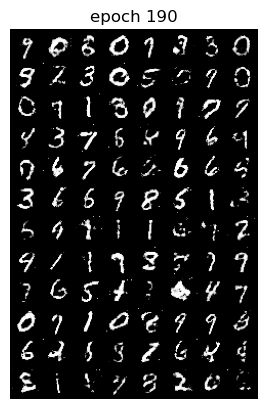

Epoch 190 of 200
Generator loss: 1.12275971, Discriminator loss: 1.15681070


118it [00:04, 25.83it/s]                         


Epoch 191 of 200
Generator loss: 1.10371255, Discriminator loss: 1.16681247


118it [00:04, 25.19it/s]                         


Epoch 192 of 200
Generator loss: 1.10610247, Discriminator loss: 1.16384059


118it [00:04, 26.12it/s]                         


Epoch 193 of 200
Generator loss: 1.13566724, Discriminator loss: 1.14918630


118it [00:04, 26.20it/s]                         


Epoch 194 of 200
Generator loss: 1.11432148, Discriminator loss: 1.16575309


118it [00:04, 27.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


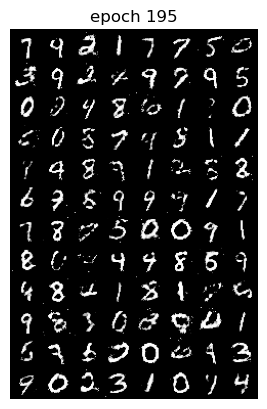

Epoch 195 of 200
Generator loss: 1.13365410, Discriminator loss: 1.15132457


118it [00:04, 26.07it/s]                         


Epoch 196 of 200
Generator loss: 1.12002698, Discriminator loss: 1.16215447


118it [00:04, 26.83it/s]                         


Epoch 197 of 200
Generator loss: 1.14669537, Discriminator loss: 1.14825842


118it [00:04, 26.89it/s]                         


Epoch 198 of 200
Generator loss: 1.12376777, Discriminator loss: 1.15150571


118it [00:04, 25.98it/s]                         


Epoch 199 of 200
Generator loss: 1.11214989, Discriminator loss: 1.15725373


118it [00:04, 26.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


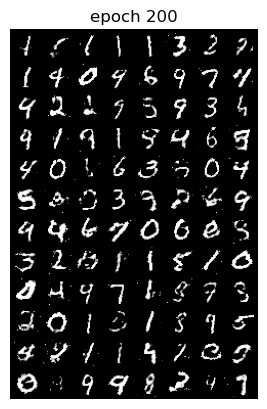

Epoch 200 of 200
Generator loss: 1.11590928, Discriminator loss: 1.15857973


In [35]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
     #w = torch.tensor(1/output.shape[0])
     g_loss = criterion(output, true_label)
     return g_loss
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    #w = torch.tensor(1/output[0].shape[0])

    real_loss = criterion(output[0], true_label[0])
    fake_loss = criterion(output[1], true_label[1])

    d_loss = (real_loss + fake_loss)
    return d_loss
    ######################################
    
epochs = 200
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        m = data[0].shape[0] # batch size
        sigma_sq = 0.01
        smooth = 0.1
        
        
        # Create labels
        #print(real_d)
        #print(fake_d)
        real_y = label_real(m)
        fake_y = label_fake(m) 
        
        # smooth labels for discriminator
        #real_y = real_y * (1 - smooth)
        #fake_y = smooth * (1 - fake_y)
        
        k = 1 #number of steps to apply to the discriminator
        for step in range(k):
            # discriminator foward pass
            # sample m noise samples
            noise = create_noise(m, nz)

            # generate fake data
            fake_data = generator(noise).view(-1, 784).to(device)
            real_data = data[0].view(-1, 784).to(device)
            #print(real_data, torch.max(real_data), torch.min(real_data))
            
            # # Add noise to discriminator input
            # real_data += torch.normal(0, sigma_sq, size=(m,784)).to(device)
            # fake_data = fake_data + torch.normal(0, sigma_sq, size=(m,784)).to(device)
            # #print(real_data, torch.max(real_data), torch.min(real_data))
            
            # calculate discriminator loss
            real_d = discriminator(real_data)
            fake_d = discriminator(fake_data)
        

            output_arr = [real_d, fake_d]
            true_label_arr = [real_y, fake_y]
            

            # update discriminator
            optim_d.zero_grad()
            loss_d_i = discriminator_loss(output_arr, true_label_arr)
            loss_d_i.backward()
            optim_d.step()

        k = 1 # number of steps to apply to the generator
        for steps in range(k):
            # generator forward pass
            noise = create_noise(m, nz)
            fake_data = generator(noise).view(-1, 784).to(device)
            
            # # Add noise to discriminator input
            # fake_data = fake_data + torch.normal(0, sigma_sq, size=(m,784)).to(device)
            
            fake_d = discriminator(fake_data)
            # update generator
            optim_g.zero_grad()
            loss_g_i = generator_loss(fake_d, real_y)
            loss_g_i.backward()
            optim_g.step()

        loss_g += loss_g_i.item()
        loss_d += loss_d_i.item()
        #print(loss_g)
        #print(loss_d)
        ######################################
        #break
    
    #break
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")
    #break

118it [00:28,  4.09it/s]                         


Epoch 1 of 100
Generator loss: 0.05313906, Discriminator loss: 0.07895386


118it [00:30,  3.88it/s]                         


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.02it/s]                         


Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.87it/s]                         


Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


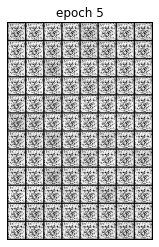

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  4.04it/s]                         


Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.84it/s]                         


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.72it/s]                         


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.69it/s]                         


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


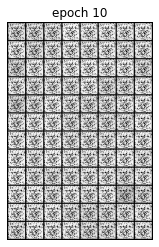

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.92it/s]                         


Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.90it/s]                         


Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.94it/s]                         


Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.84it/s]                         


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


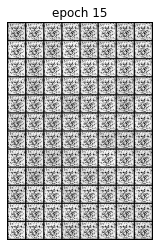

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.79it/s]                         


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.57it/s]                         


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.54it/s]                         


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.53it/s]                         


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


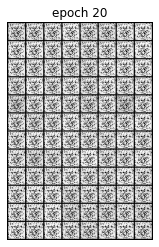

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.60it/s]                         


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.47it/s]                         


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.49it/s]                         


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.45it/s]                         


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


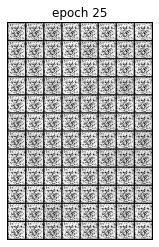

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.73it/s]                         


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.70it/s]                         


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.53it/s]                         


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.42it/s]                         


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


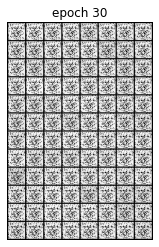

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.55it/s]                         


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.67it/s]                         


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.52it/s]                         


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.49it/s]                         


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.69it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


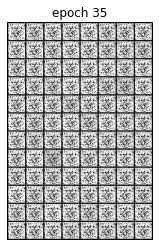

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.46it/s]                         


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.58it/s]                         


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.84it/s]                         


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.88it/s]                         


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.70it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


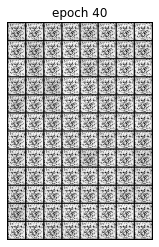

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.77it/s]                         


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.48it/s]                         


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.39it/s]                         


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.86it/s]                         


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


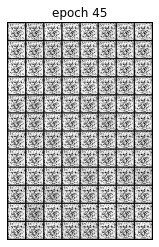

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.87it/s]                         


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.67it/s]                         


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.42it/s]                         


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.65it/s]                         


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


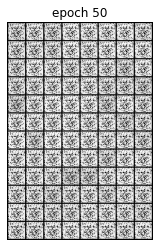

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.58it/s]                         


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.64it/s]                         


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.47it/s]                         


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.66it/s]                         


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


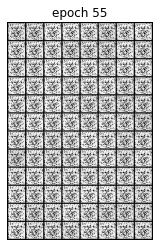

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.84it/s]                         


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.51it/s]                         


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.61it/s]                         


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:29,  3.97it/s]                         


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


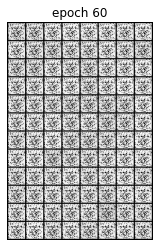

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.70it/s]                         


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.62it/s]                         


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.54it/s]                         


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.59it/s]                         


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


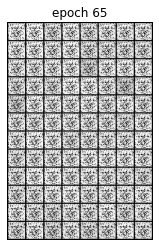

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:33,  3.57it/s]                         


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.66it/s]                         


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.69it/s]                         


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.79it/s]                         


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


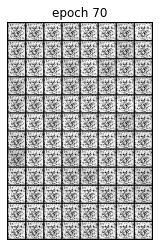

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                         


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.82it/s]                         


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.84it/s]                         


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                         


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


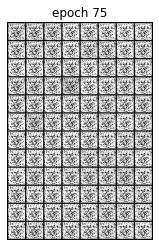

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.82it/s]                         


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.87it/s]                         


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                         


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.74it/s]                         


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


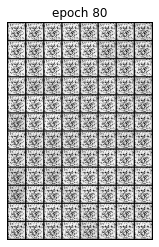

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.82it/s]                         


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.78it/s]                         


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.82it/s]                         


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:32,  3.66it/s]                         


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.85it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


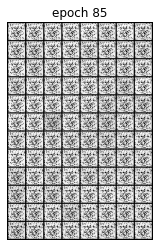

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.77it/s]                         


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.74it/s]                         


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.82it/s]                         


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.84it/s]                         


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


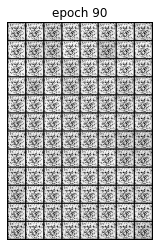

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                         


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.75it/s]                         


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.81it/s]                         


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.75it/s]                         


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:30,  3.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


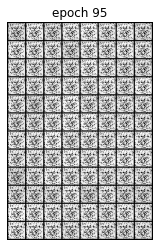

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.80it/s]                         


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.78it/s]                         


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.72it/s]                         


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.79it/s]                         


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:31,  3.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


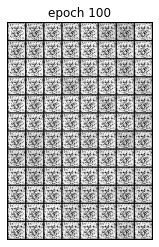

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [15]:
# Q1 B)

torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
     #w = torch.tensor(1/output.shape[0])
     g_loss = criterion(output, true_label)
     return g_loss
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    #w = torch.tensor(1/output[0].shape[0])

    real_loss = criterion(output[0], true_label[0])
    fake_loss = criterion(output[1], true_label[1])

    d_loss = (real_loss + fake_loss)
    return d_loss
    ######################################
    
epochs = 100
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        m = data[0].shape[0] # batch size
        sigma_sq = 0.01
        k = 1 #number of steps to apply to the discriminator
        for step in range(k):
            # discriminator foward pass
            # sample m noise samples
            noise = create_noise(m, nz)

            # generate fake data
            fake_data = generator(noise).view(-1, 784).to(device)
            real_data = data[0].view(-1, 784).to(device)
            #print(real_data, torch.max(real_data), torch.min(real_data))
            
            # # Add noise to discriminator input
            # real_data += torch.normal(0, sigma_sq, size=(m,784)).to(device)
            # fake_data = fake_data + torch.normal(0, sigma_sq, size=(m,784)).to(device)
            # #print(real_data, torch.max(real_data), torch.min(real_data))
            
            # calculate discriminator loss
            real_d = discriminator(real_data)
            fake_d = discriminator(fake_data)
            
          
            
            #print(real_d)
            #print(fake_d)
            real_y = label_real(m)
            fake_y = label_fake(m) 

            output_arr = [real_d, fake_d]
            true_label_arr = [real_y, fake_y]
            

            # update discriminator
            optim_d.zero_grad()
            loss_d_i = discriminator_loss(output_arr, true_label_arr)
            loss_d_i.backward()
            optim_d.step()

        k = 1 # number of steps to apply to the generator
        for steps in range(k):
            # generator forward pass
            noise = create_noise(m, nz)
            fake_data = generator(noise).view(-1, 784).to(device)
            
            # # Add noise to discriminator input
            # fake_data = fake_data + torch.normal(0, sigma_sq, size=(m,784)).to(device)
            
            fake_d = discriminator(fake_data)
            # update generator
            optim_g.zero_grad()
            loss_g_i = generator_loss(fake_d, fake_y)
            loss_g_i.backward()
            optim_g.step()

        loss_g += loss_g_i.item()
        loss_d += loss_d_i.item()
        #print(loss_g)
        #print(loss_d)
        ######################################
        #break
    
    #break
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")
    #break

In [16]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [17]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

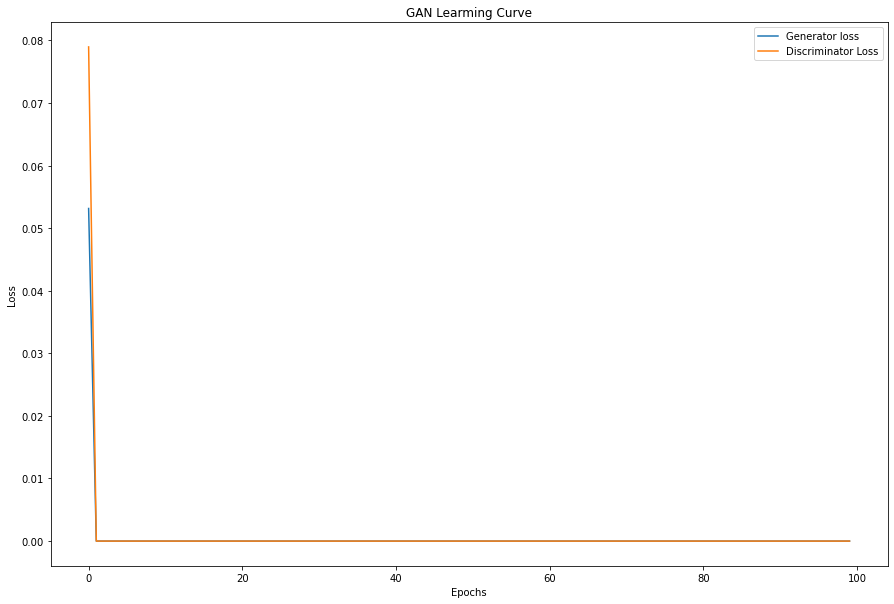

In [18]:
# plot and save the generator and discriminator loss
plt.figure(figsize=(15,10))
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
#plt.yticks(np.arange(0, 6, 0.5))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("GAN Learming Curve")
plt.legend()
plt.savefig('outputs/loss.jpg')

In [55]:
losses_d

[0.0]

In [21]:
epochs

100